<img align="left" src="images/GMIT-logo.png" alt="GMIT" width="250"/>                                                      <img align="right" src="images/data-analytics.png" alt="HDipDA" width="300"/>  

# <center>Fundamentals of Data Analysis - Tips Project 2019</center> #

***
**Module Name**: Fundamentals of Data Analysis  
**Module Number**: 52446  
**Student Name**: Yvonne Brady  
**Student ID**: G00376355  
***

### Description - 30%###
Create a git repository and make it available online for the lecturer to clone. The repository should contain all your work for this assessment. Within the repository, create a jupyter notebook that uses descriptive statistics and plots to describe the tips dataset. This part is worth 30% of your overall mark.

One waiter recorded information about each tip he received over a period of a few months working in one restaurant. They recorded several variables:
- _*total_bill*_ : Total Bill Amount
- _*tip*_ : Tip amount
- _*sex*_ : Gender of bill payer
- _*smoker*_ : Whether they were a smoker or not
- _*day*_ : What day of the week the transaction occurred
- _*time*_ : Whether the diner was being server lunch or dinner

In [1]:
# First of all import all the packages you need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# And the dataset itself (also included in this repository)
tips = sns.load_dataset("tips")

# Now have a look at the data
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [2]:
print("The dataset has",tips.shape[0], "rows each with", tips.shape[1], "attributes - totaling", tips.size, "data values in the dataset.")
print("Over the data collection period, the waiter served", tips['size'].sum(), "customers, generating an income of $", tips["total_bill"].sum(), ". ")
print("This resulted in tips totalling $", tips["tip"].sum(), ".")
print("The day breakdown is as follows:")
print(tips.groupby("day").size())

The dataset has 244 rows each with 7 attributes - totaling 1708 data values in the dataset.
Over the data collection period, the waiter served 627 customers, generating an income of $ 4827.77 . 
This resulted in tips totalling $ 731.5799999999999 .
The day breakdown is as follows:
day
Thur    62
Fri     19
Sat     87
Sun     76
dtype: int64


In [3]:
# Now have a look at the data
tips.sample(5) # returns 5 randomly selected rows

total_bill  tip     sex smoker   day    time  size
220       12.16  2.2    Male    Yes   Fri   Lunch     2
83        32.68  5.0    Male    Yes  Thur   Lunch     2
190       15.69  1.5    Male    Yes   Sun  Dinner     2
178        9.60  4.0  Female    Yes   Sun  Dinner     2
123       15.95  2.0    Male     No  Thur   Lunch     2

**Just playing around here**  
Just playing around with the data on a category by category basis to see what they show.  
Unsure of how I should present these - as code and then summarised in markdown?  
Print functions displaying data above is ugly. It is likely that a lot of what follows will be discarded in any event.

In [4]:
# How much was spent by each gender
tips.groupby("sex")["total_bill"].sum()

sex
Male      3256.82
Female    1570.95
Name: total_bill, dtype: float64

In [5]:
tips.groupby("sex")["tip"].sum()

sex
Male      485.07
Female    246.51
Name: tip, dtype: float64

In [6]:
tips.groupby("sex")["tip"].sum()/tips.groupby("sex")["total_bill"].sum()

sex
Male      0.148940
Female    0.156918
dtype: float64

In [7]:
# How much was spent broken down by smoker status
tips.groupby("smoker")["total_bill"].sum()

smoker
Yes    1930.34
No     2897.43
Name: total_bill, dtype: float64

In [8]:
tips.groupby("smoker")["tip"].sum()

smoker
Yes    279.81
No     451.77
Name: tip, dtype: float64

In [9]:
tips.groupby("smoker")["tip"].sum()/tips.groupby("smoker")["total_bill"].sum()

smoker
Yes    0.144954
No     0.155921
dtype: float64

In [10]:
# How much was spent broken down by day
tips.groupby("day")["total_bill"].sum()

day
Thur    1096.33
Fri      325.88
Sat     1778.40
Sun     1627.16
Name: total_bill, dtype: float64

In [11]:
tips.groupby("day")["tip"].sum()

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

In [12]:
tips.groupby("day")["tip"].sum()/tips.groupby("day")["total_bill"].sum()

day
Thur    0.156732
Fri     0.159445
Sat     0.146424
Sun     0.152038
dtype: float64

In [13]:
# How much was spent broken down by time
tips.groupby("time")["total_bill"].sum()

time
Lunch     1167.47
Dinner    3660.30
Name: total_bill, dtype: float64

In [14]:
# How much was spent broken down by day
tips.groupby("time")["tip"].sum()

time
Lunch     185.51
Dinner    546.07
Name: tip, dtype: float64

In [15]:
tips.groupby("time")["tip"].sum()/tips.groupby("time")["total_bill"].sum()

time
Lunch     0.158899
Dinner    0.149187
dtype: float64

In [16]:
# How much was spent broken down by party size
tips.groupby("size")["total_bill"].sum()

size
1      28.97
2    2565.89
3     884.55
4    1058.70
5     150.34
6     139.32
Name: total_bill, dtype: float64

In [17]:
tips.groupby("size")["tip"].sum()

size
1      5.75
2    402.84
3    128.94
4    153.01
5     20.14
6     20.90
Name: tip, dtype: float64

In [18]:
tips.groupby("size")["tip"].sum()/tips.groupby("size")["total_bill"].sum()

size
1    0.198481
2    0.156998
3    0.145769
4    0.144526
5    0.133963
6    0.150014
dtype: float64

**General Observation**  
Based on the rudimentary calculations above, it would appear the best tip ratio is to be found if the waiter serves lunch on a Friday to a non-smoking woman dining on her own. Mind you this particular scenario accounted for exactly $0 in tips, so I guess the conclusion of this part would be - don't rely on generalities!

In [19]:
# Just checking which was the most common scenario - Sunday dinner with non-smoking males apparently
(tips.groupby(["day", "time", "sex", "smoker"]).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count') 
   )

day    time     sex smoker  count
0    Sun  Dinner    Male     No     43
1    Sat  Dinner    Male     No     32
2    Sat  Dinner    Male    Yes     27
3   Thur   Lunch  Female     No     24
4   Thur   Lunch    Male     No     20
5    Sun  Dinner    Male    Yes     15
6    Sat  Dinner  Female    Yes     15
7    Sun  Dinner  Female     No     14
8    Sat  Dinner  Female     No     13
9   Thur   Lunch    Male    Yes     10
10  Thur   Lunch  Female    Yes      7
11   Fri  Dinner    Male    Yes      5
12   Sun  Dinner  Female    Yes      4
13   Fri  Dinner  Female    Yes      4
14   Fri   Lunch  Female    Yes      3
15   Fri   Lunch    Male    Yes      3
16   Fri  Dinner    Male     No      2
17   Fri   Lunch  Female     No      1
18  Thur  Dinner  Female     No      1
19   Fri  Dinner  Female     No      1

In [20]:
tips["day"].value_counts()
tips.describe()

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

In [21]:
tips.groupby("day").describe()

total_bill                                                             \
          count       mean       std   min      25%    50%      75%    max   
day                                                                          
Thur       62.0  17.682742  7.886170  7.51  12.4425  16.20  20.1550  43.11   
Fri        19.0  17.151579  8.302660  5.75  12.0950  15.38  21.7500  40.17   
Sat        87.0  20.441379  9.480419  3.07  13.9050  18.24  24.7400  50.81   
Sun        76.0  21.410000  8.832122  7.25  14.9875  19.63  25.5975  48.17   

       tip            ...                 size                                \
     count      mean  ...     75%    max count      mean       std  min  25%   
day                   ...                                                      
Thur  62.0  2.771452  ...  3.3625   6.70  62.0  2.451613  1.066285  1.0  2.0   
Fri   19.0  2.734737  ...  3.3650   4.73  19.0  2.105263  0.567131  1.0  2.0   
Sat   87.0  2.993103  ...  3.3700  10.00  87.0  2.517241  0.819275  1.0  2.0   
Sun   76.0  3.255132  ...  4.0000   6.50  76.0  2.842105  1.007341  2.0  2.0   

                     
      50%  75%  max  
day                  
Thur  2.0  2.0  6.0  
Fri   2.0  2.0  4.0  
Sat   2.0  3.0  5.0  
Sun   2.0  4.0  6.0  

[4 rows x 24 columns]

In [22]:
# Found this and thought it was worth trying ...
import pandas_profiling

profile = pandas_profiling.ProfileReport(tips)
profile

This is a really interesting summary of the data - with lots of information, both numeric and graphical contained within it.

## Start Plotting ##
First off we will look at the variables individually.  
  
_Note: This is preliminary - I will almost certainly not include everything here in final submission._

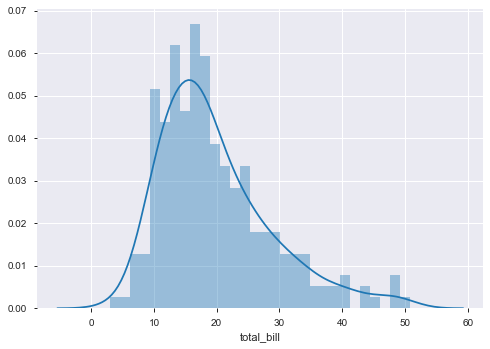

In [23]:
sns.distplot(tips['total_bill'],kde=True,bins=30)

Looking at the histogram displayed the bulk of the bills fell between the \\$10 to \\$25 bracket.

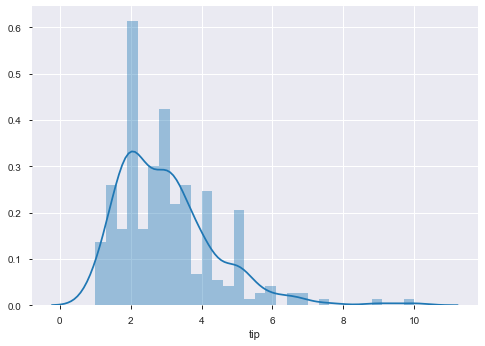

In [24]:
sns.distplot(tips['tip'],kde=True,bins=30)

And the bulk of the tips were between \\$1 and \\$3.50, with more outliers than in the bill amounts. Unlike the bill amounts though the outliers are more prevalent on the upward range.

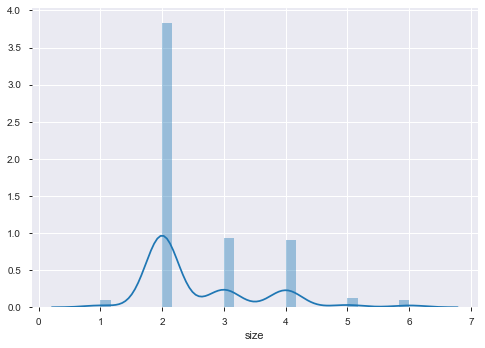

In [25]:
sns.distplot(tips['size'],kde=True,bins=30)

By far the most prevalent party size was 2 people.

## Plotting the Categorical Data ##

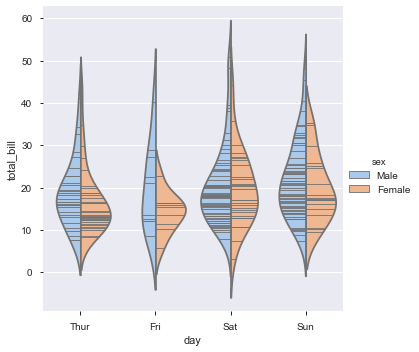

In [26]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

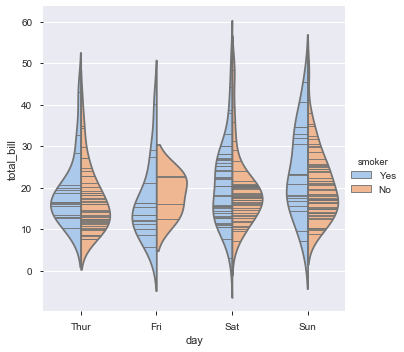

In [27]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

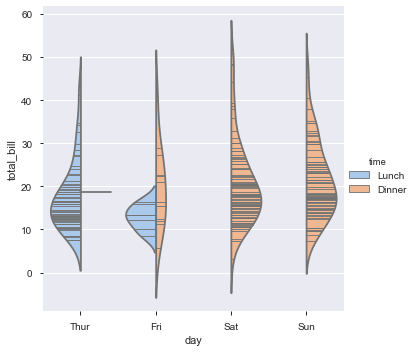

In [28]:
sns.catplot(x="day", y="total_bill", hue="time",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

## Bi-Variate Plotting ##

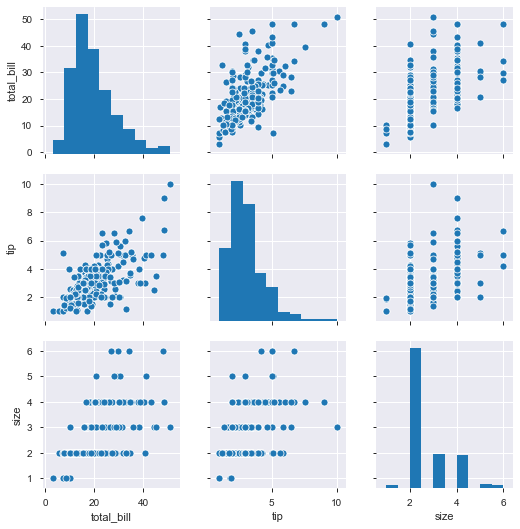

In [29]:
sns.pairplot(tips)

In [30]:
from scipy import stats

In [31]:
# Get the regression line using all the data
t_slope, t_intercept, t_r2, t_p, t_stdErr = stats.linregress(tips["total_bill"], tips["tip"])

In [32]:
# See how good a fit it is
t_r2

0.6757341092113641

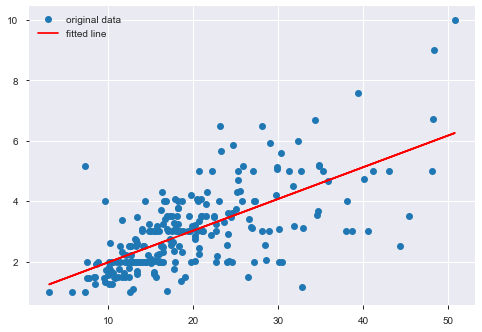

In [33]:
# Plot both the raw data and the "best fit" line
plt.plot(tips["total_bill"], tips["tip"], 'o', label='original data')
plt.plot(tips["total_bill"], t_intercept + t_slope*tips["total_bill"], 'r', label='fitted line')
plt.legend()
plt.show()

In [34]:
# Create dataframes based on the categories - first up Time
dinner = tips.loc[tips["time"] == "Dinner"]
lunch = tips.loc[tips["time"] == "Lunch"]
smoker = tips.loc[tips["smoker"] == "Yes"]
nonsmoker = tips.loc[tips["smoker"] == "No"]
male = tips.loc[tips["sex"] == "Male"]
female = tips.loc[tips["sex"] == "Female"]
size1 = tips.loc[tips["size"] == 1]
size2 = tips.loc[tips["size"] == 2]
size3 = tips.loc[tips["size"] == 3]
size4 = tips.loc[tips["size"] == 4]
size5 = tips.loc[tips["size"] == 5]
size6 = tips.loc[tips["size"] == 6]

In [35]:
# Time of day comparison
# Get the regression line using all the data
d_slope, d_intercept, d_r2, d_p, d_stdErr = stats.linregress(dinner["total_bill"], dinner["tip"])
l_slope, l_intercept, l_r2, l_p, l_stdErr = stats.linregress(lunch["total_bill"], lunch["tip"])
print("r^2 dinner (Dataset size", len(dinner.index), "rows) = ", d_r2)
print("r^2 lunch (Dataset size", len(lunch.index), "rows) = ", l_r2)

r^2 dinner (Dataset size 176 rows) =  0.632871246985668
r^2 lunch (Dataset size 68 rows) =  0.8054238363495536


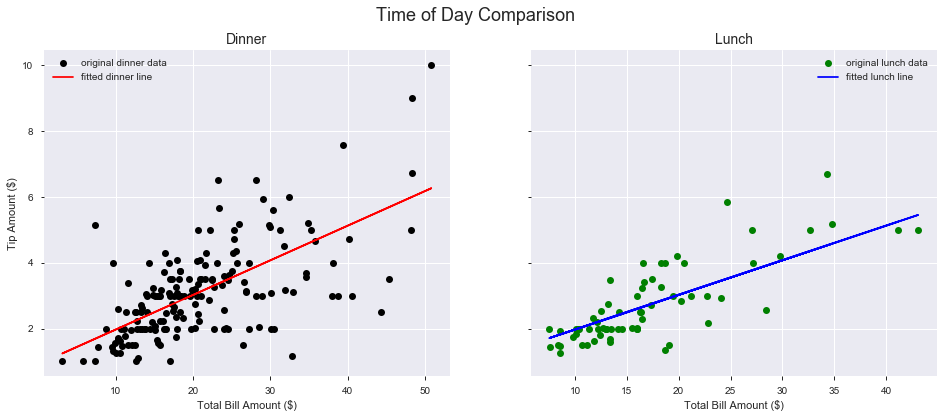

In [36]:
plt.rcParams['figure.figsize'] = [16, 6]

# Plot both the raw data and the "best fit" lines
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(dinner["total_bill"], dinner["tip"], 'ko', label='original dinner data')
ax1.plot(dinner["total_bill"], t_intercept + t_slope*dinner["total_bill"], 'r', label='fitted dinner line')
ax1.legend()
ax2.plot(lunch["total_bill"], lunch["tip"], 'go', label='original lunch data')
ax2.plot(lunch["total_bill"], t_intercept + t_slope*lunch["total_bill"], 'b', label='fitted lunch line')
ax2.legend()

# Set labels
ax1.set_xlabel('Total Bill Amount ($)')
ax2.set_xlabel('Total Bill Amount ($)')
ax1.set_ylabel('Tip Amount ($)')
fig.suptitle('Time of Day Comparison', fontsize=18)
ax1.set_title('Dinner',fontsize=14)
ax2.set_title('Lunch',fontsize=14)
plt.show()

In [37]:
# Smoker comparison
# Get the regression line using all the data
s_slope, s_intercept, s_r2, s_p, s_stdErr = stats.linregress(smoker["total_bill"], smoker["tip"])
ns_slope, ns_intercept, ns_r2, ns_p, ns_stdErr = stats.linregress(nonsmoker["total_bill"], nonsmoker["tip"])
print("r^2 smokers (Dataset size", len(smoker.index), "rows) = ", s_r2)
print("r^2 non-smokers (Dataset size", len(nonsmoker.index), "rows) = ", ns_r2)

r^2 smokers (Dataset size 93 rows) =  0.48821794116281036
r^2 non-smokers (Dataset size 151 rows) =  0.8221826257050836


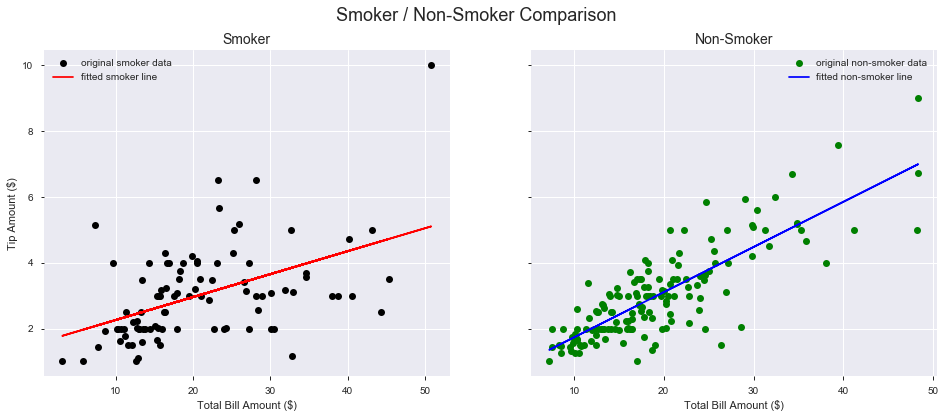

In [38]:
plt.rcParams['figure.figsize'] = [16, 6]
#fig=plt.figure(figsize=(5, 10),  facecolor='w', edgecolor='k')
# Plot both the raw data and the "best fit" lines
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(smoker["total_bill"], smoker["tip"], 'ko', label='original smoker data')
ax1.plot(smoker["total_bill"], s_intercept + s_slope*smoker["total_bill"], 'r', label='fitted smoker line')
ax1.legend()
ax2.plot(nonsmoker["total_bill"], nonsmoker["tip"], 'go', label='original non-smoker data')
ax2.plot(nonsmoker["total_bill"], ns_intercept + ns_slope*nonsmoker["total_bill"], 'b', label='fitted non-smoker line')
ax2.legend()

# Set labels
ax1.set_xlabel('Total Bill Amount ($)')
ax2.set_xlabel('Total Bill Amount ($)')
ax1.set_ylabel('Tip Amount ($)')
fig.suptitle('Smoker / Non-Smoker Comparison', fontsize=18)
ax1.set_title('Smoker',fontsize=14)
ax2.set_title('Non-Smoker',fontsize=14)
plt.show()

In [39]:
# Gender comparison
# Get the regression line using all the data
m_slope, m_intercept, m_r2, m_p, m_stdErr = stats.linregress(male["total_bill"], male["tip"])
f_slope, f_intercept, f_r2, f_p, f_stdErr = stats.linregress(female["total_bill"], female["tip"])
print("r^2 male (Dataset size", len(male.index), "rows) = ", m_r2)
print("r^2 female (Dataset size", len(female.index), "rows) = ", f_r2)

r^2 male (Dataset size 157 rows) =  0.6697529858911426
r^2 female (Dataset size 87 rows) =  0.6829992918122414


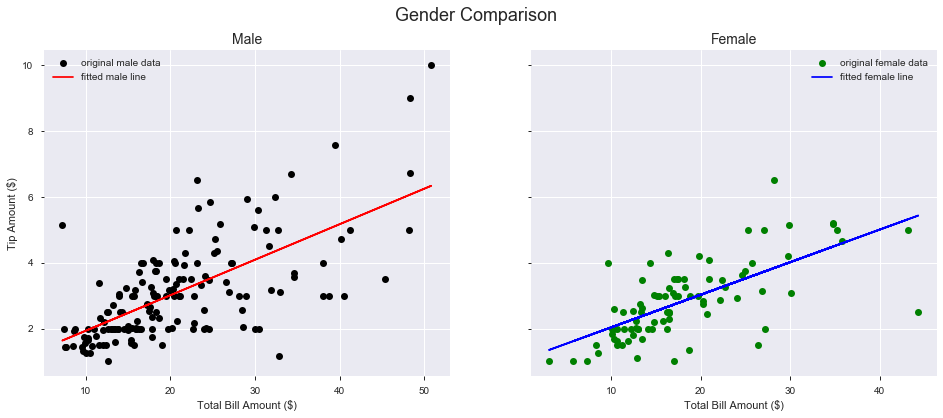

In [40]:
plt.rcParams['figure.figsize'] = [16, 6]
#fig=plt.figure(figsize=(5, 10),  facecolor='w', edgecolor='k')
# Plot both the raw data and the "best fit" lines
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(male["total_bill"], male["tip"], 'ko', label='original male data')
ax1.plot(male["total_bill"], m_intercept + m_slope*male["total_bill"], 'r', label='fitted male line')
ax1.legend()
ax2.plot(female["total_bill"], female["tip"], 'go', label='original female data')
ax2.plot(female["total_bill"], f_intercept + f_slope*female["total_bill"], 'b', label='fitted female line')
ax2.legend()

# Set labels
ax1.set_xlabel('Total Bill Amount ($)')
ax2.set_xlabel('Total Bill Amount ($)')
ax1.set_ylabel('Tip Amount ($)')
fig.suptitle('Gender Comparison', fontsize=18)
ax1.set_title('Male',fontsize=14)
ax2.set_title('Female',fontsize=14)
plt.show()

In [41]:
# Party Size comparison
# Get the regression line using all the data
s1_slope, s1_intercept, s1_r2, s1_p, s1_stdErr = stats.linregress(size1["total_bill"], size1["tip"])
s2_slope, s2_intercept, s2_r2, s2_p, s2_stdErr = stats.linregress(size2["total_bill"], size2["tip"])
s3_slope, s3_intercept, s3_r2, s3_p, s3_stdErr = stats.linregress(size3["total_bill"], size3["tip"])
s4_slope, s4_intercept, s4_r2, s4_p, s4_stdErr = stats.linregress(size4["total_bill"], size4["tip"])
s5_slope, s5_intercept, s5_r2, s5_p, s5_stdErr = stats.linregress(size5["total_bill"], size5["tip"])
s6_slope, s6_intercept, s6_r2, s6_p, s6_stdErr = stats.linregress(size6["total_bill"], size6["tip"])
print("r^2 Party Size 1 (Dataset size", len(size1.index), "rows) = ", s1_r2)
print("r^2 Party Size 2 (Dataset size", len(size2.index), "rows) = ", s2_r2)
print("r^2 Party Size 3 (Dataset size", len(size3.index), "rows) = ", s3_r2)
print("r^2 Party Size 4 (Dataset size", len(size4.index), "rows) = ", s4_r2)
print("r^2 Party Size 5 (Dataset size", len(size5.index), "rows) = ", s5_r2)
print("r^2 Party Size 6 (Dataset size", len(size6.index), "rows) = ", s6_r2)

r^2 Party Size 1 (Dataset size 4 rows) =  0.7819380610281642
r^2 Party Size 2 (Dataset size 156 rows) =  0.4811509958463354
r^2 Party Size 3 (Dataset size 38 rows) =  0.5897440237023541
r^2 Party Size 4 (Dataset size 37 rows) =  0.6760879540843564
r^2 Party Size 5 (Dataset size 5 rows) =  0.062186249409241744
r^2 Party Size 6 (Dataset size 4 rows) =  0.10535541767159408


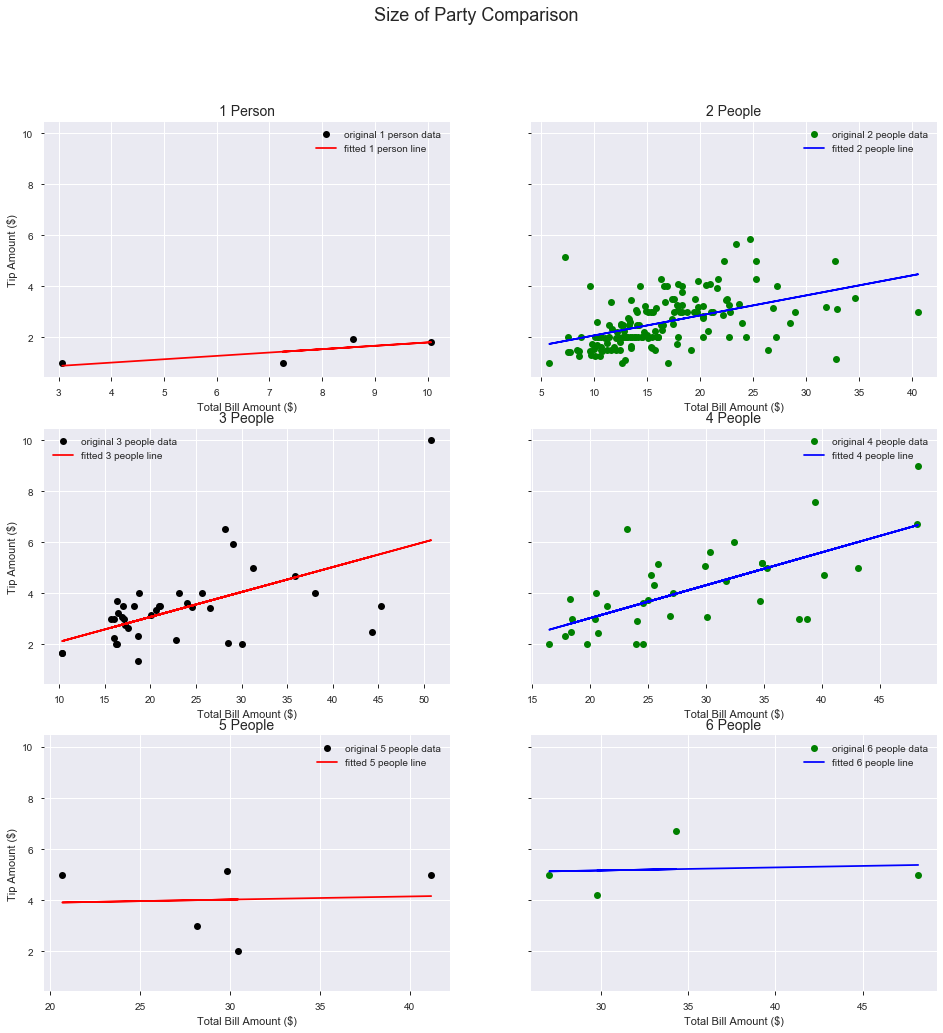

In [42]:
plt.rcParams['figure.figsize'] = [16,16]

# Plot both the raw data and the "best fit" lines
fig, ((ax1, ax2), (ax3, ax4), ( ax5, ax6)) = plt.subplots(3, 2, sharey=True)

ax1.plot(size1["total_bill"], size1["tip"], 'ko', label='original 1 person data')
ax1.plot(size1["total_bill"], s1_intercept + s1_slope*size1["total_bill"], 'r', label='fitted 1 person line')
ax1.legend()
ax2.plot(size2["total_bill"], size2["tip"], 'go', label='original 2 people data')
ax2.plot(size2["total_bill"], s2_intercept + s2_slope*size2["total_bill"], 'b', label='fitted 2 people line')
ax2.legend()
ax3.plot(size3["total_bill"], size3["tip"], 'ko', label='original 3 people data')
ax3.plot(size3["total_bill"], s3_intercept + s3_slope*size3["total_bill"], 'r', label='fitted 3 people line')
ax3.legend()
ax4.plot(size4["total_bill"], size4["tip"], 'go', label='original 4 people data')
ax4.plot(size4["total_bill"], s4_intercept + s4_slope*size4["total_bill"], 'b', label='fitted 4 people line')
ax4.legend()
ax5.plot(size5["total_bill"], size5["tip"], 'ko', label='original 5 people data')
ax5.plot(size5["total_bill"], s5_intercept + s5_slope*size5["total_bill"], 'r', label='fitted 5 people line')
ax5.legend()
ax6.plot(size6["total_bill"], size6["tip"], 'go', label='original 6 people data')
ax6.plot(size6["total_bill"], s6_intercept + s6_slope*size6["total_bill"], 'b', label='fitted 6 people line')
ax6.legend()

# Set labels
ax1.set_xlabel('Total Bill Amount ($)')
ax2.set_xlabel('Total Bill Amount ($)')
ax3.set_xlabel('Total Bill Amount ($)')
ax4.set_xlabel('Total Bill Amount ($)')
ax5.set_xlabel('Total Bill Amount ($)')
ax6.set_xlabel('Total Bill Amount ($)')
ax1.set_ylabel('Tip Amount ($)')
ax3.set_ylabel('Tip Amount ($)')
ax5.set_ylabel('Tip Amount ($)')
fig.suptitle('Size of Party Comparison', fontsize=18)
ax1.set_title('1 Person',fontsize=14)
ax2.set_title('2 People',fontsize=14)
ax3.set_title('3 People',fontsize=14)
ax4.set_title('4 People',fontsize=14)
ax5.set_title('5 People',fontsize=14)
ax6.set_title('6 People',fontsize=14)
plt.show()

In [44]:
from tabulate import tabulate
table = [["Smokers", len(smoker.index), s_slope, s_intercept, s_r2, s_p, s_stdErr], \
         ["Non-Smokers", len(nonsmoker.index), ns_slope, ns_intercept, ns_r2, ns_p, ns_stdErr], \
         ["Male", len(male.index), m_slope, m_intercept, m_r2, m_p, m_stdErr], \
         ["Female", len(female.index), f_slope, f_intercept, f_r2, f_p, f_stdErr], \
         ["Lunch", len(lunch.index), l_slope, l_intercept, l_r2, l_p, l_stdErr], \
         ["Dinner", len(dinner.index), d_slope, d_intercept, d_r2, d_p, d_stdErr], \
         ["Party of 1", len(size1.index), s1_slope, s1_intercept, s1_r2, s1_p, s1_stdErr], \
         ["Party of 2", len(size2.index), s2_slope, s2_intercept, s2_r2, s2_p, s2_stdErr], \
         ["Party of 3", len(size3.index), s3_slope, s3_intercept, s3_r2, s3_p, s3_stdErr], \
         ["Party of 4", len(size4.index), s4_slope, s4_intercept, s4_r2, s4_p, s4_stdErr], \
         ["Party of 5", len(size5.index), s5_slope, s5_intercept, s5_r2, s5_p, s5_stdErr], \
         ["Party of 6", len(size6.index), s6_slope, s6_intercept, s6_r2, s6_p, s6_stdErr]]
hdr = ["Category", "Sample Size", "Slope", "Intercept", "R^2 Value", "P-Value", "Std Error"]
print(tabulate(table, headers = hdr,  tablefmt="grid"))

+-------------+---------------+-----------+-------------+-------------+-------------+-------------+
| Category    |   Sample Size |     Slope |   Intercept |   R^2 Value |     P-Value |   Std Error |
+=============+===============+===========+=============+=============+=============+=============+
| Smokers     |            93 | 0.0695902 |    1.56427  |   0.488218  | 6.89401e-07 |  0.0130404  |
+-------------+---------------+-----------+-------------+-------------+-------------+-------------+
| Non-Smokers |           151 | 0.137156  |    0.360069 |   0.822183  | 2.72556e-38 |  0.00777922 |
+-------------+---------------+-----------+-------------+-------------+-------------+-------------+
| Male        |           157 | 0.107861  |    0.852148 |   0.669753  | 8.75758e-22 |  0.00960568 |
+-------------+---------------+-----------+-------------+-------------+-------------+-------------+
| Female      |            87 | 0.0988779 |    1.04802  |   0.682999  | 3.15953e-13 |  0.0114694  |


### Regression - 30% ###
To the above jupyter notebook add a section that discusses and analyses whether there is a relationship between the total bill and tip amount, and this part is also worth 30%.

### Analysis - 40% ###
Again using the same notebook, analyse the relationship between the variables within the dataset. You are free to interpret this as you wish — for example, you may analyse all pairs of variables, or select a subset and analyse those. This part is worth 40%.

### References ###
[1] https://github.com/mwaskom/seaborn-data/blob/master/tips.csv.
[2] https://rdrr.io/cran/regclass/man/TIPS.html
[3] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html